In [1]:
from __future__ import print_function
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

In [2]:
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [3]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch: 0050 cost= 0.077896543 W= 0.23301734 b= 0.92071503
Epoch: 0100 cost= 0.077793397 W= 0.23400304 b= 0.91362405
Epoch: 0150 cost= 0.077702090 W= 0.23493019 b= 0.90695405
Epoch: 0200 cost= 0.077621199 W= 0.23580217 b= 0.90068066
Epoch: 0250 cost= 0.077549607 W= 0.23662245 b= 0.8947801
Epoch: 0300 cost= 0.077486195 W= 0.23739387 b= 0.8892304
Epoch: 0350 cost= 0.077430040 W= 0.2381194 b= 0.88401115
Epoch: 0400 cost= 0.077380314 W= 0.23880175 b= 0.8791022
Epoch: 0450 cost= 0.077336259 W= 0.23944357 b= 0.87448514
Epoch: 0500 cost= 0.077297218 W= 0.24004725 b= 0.8701419
Epoch: 0550 cost= 0.077262647 W= 0.240615 b= 0.86605805
Epoch: 0600 cost= 0.077232026 W= 0.241149 b= 0.8622164
Epoch: 0650 cost= 0.077204883 W= 0.24165119 b= 0.8586035
Epoch: 0700 cost= 0.077180825 W= 0.24212357 b= 0.8552053
Epoch: 0750 cost= 0.077159517 W= 0.24256784 b= 0.85200924
Epoch: 0800 cost= 0.077140629 W= 0.2429858 b= 0.

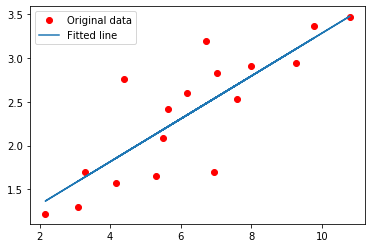

In [4]:
n_samples = train_X.shape[0]

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

Epoch: 0050 cost= 0.096560225 W= 0.17494977 b= 1.3602986
Epoch: 0100 cost= 0.104567595 W= 0.16827959 b= 1.4491311
Epoch: 0150 cost= 0.106695198 W= 0.16534165 b= 1.4731166
Epoch: 0200 cost= 0.107569337 W= 0.16416542 b= 1.4827192
Epoch: 0250 cost= 0.107922696 W= 0.16369472 b= 1.4865619
Epoch: 0300 cost= 0.108064614 W= 0.16350651 b= 1.4880989
Epoch: 0350 cost= 0.108121574 W= 0.16343103 b= 1.4887148
Epoch: 0400 cost= 0.108144455 W= 0.16340081 b= 1.4889618
Epoch: 0450 cost= 0.108153567 W= 0.1633887 b= 1.4890605
Epoch: 0500 cost= 0.108156964 W= 0.1633842 b= 1.4890971
Epoch: 0550 cost= 0.108158477 W= 0.16338232 b= 1.4891131
Epoch: 0600 cost= 0.108158544 W= 0.16338208 b= 1.4891144
Epoch: 0650 cost= 0.108158544 W= 0.16338208 b= 1.4891144
Epoch: 0700 cost= 0.108158544 W= 0.16338208 b= 1.4891144
Epoch: 0750 cost= 0.108158544 W= 0.16338208 b= 1.4891144
Epoch: 0800 cost= 0.108158544 W= 0.16338208 b= 1.4891144
Epoch: 0850 cost= 0.108158544 W= 0.16338208 b= 1.4891144
Epoch: 0900 cost= 0.108158544 W= 

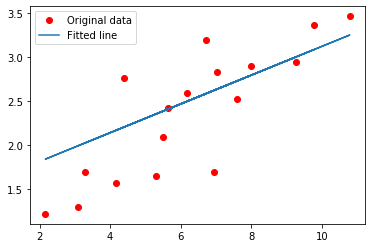

In [5]:
def acost(a): return tf.pow(pred-Y, 2) * tf.pow(tf.sign(pred-Y) + a, 2)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(acost(-0.5))
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

#### Reference:
1. https://datascience.stackexchange.com/questions/10471/linear-regression-with-non-symmetric-cost-function
2. https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/linear_regression.py